- https://graph-tool.skewed.de/static/doc/centrality.html

In [1]:
import osmnx
%matplotlib inline

In [2]:
osmnx.init(file_log=True, use_cache=True)

## Create a street network and then simplify it

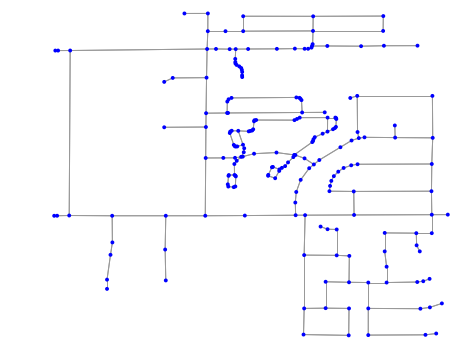

In [3]:
# create a graph around some (lat, lon) point and plot it
location_point = (33.299896, -111.831638)
G = osmnx.graph_from_point(location_point, distance=500, simplify=False)
fig, ax = osmnx.plot_graph(G, node_color='b', node_zorder=3)

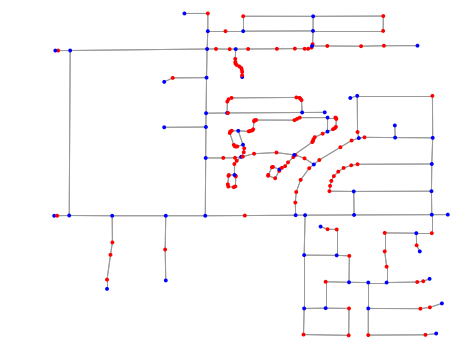

In [4]:
# show which nodes we'd remove if we simplify it
nc = ['b' if osmnx.is_endpoint(G, node) else 'r' for node in G.nodes()]
fig, ax = osmnx.plot_graph(G, node_color=nc, node_zorder=3)

In [5]:
# simplify the graph
G2 = G.copy()
G2 = osmnx.simplify_graph(G2)

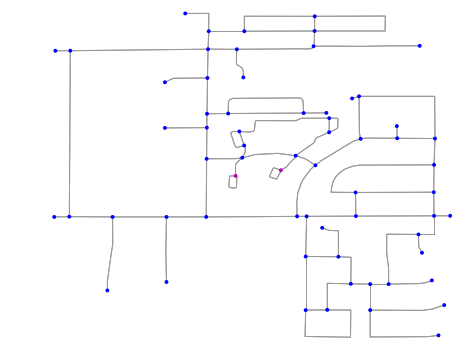

In [6]:
# plot the simplified graph and show any loops in magenta
loops = [edge[0] for edge in G2.selfloop_edges()]
nc = ['m' if node in loops else 'b' for node in G2.nodes()]
fig, ax = osmnx.plot_graph(G2, node_color=nc, node_zorder=3)

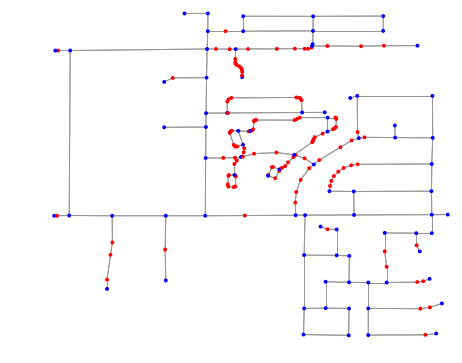

In [7]:
# turn off strict mode and see what nodes we'd remove
nc = ['b' if osmnx.is_endpoint(G, node, strict=False) else 'r' for node in G.nodes()]
fig, ax = osmnx.plot_graph(G, node_color=nc, node_zorder=3)

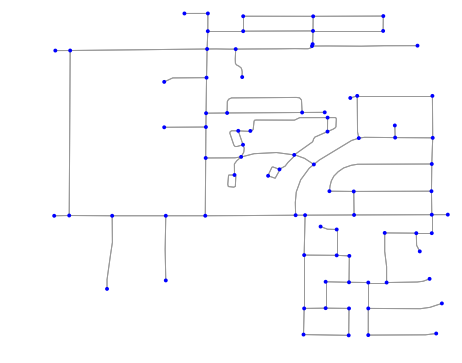

In [8]:
# simplify graph with strict mode turned off
G3 = G.copy()
G3 = osmnx.simplify_graph(G3, strict=False)
fig, ax = osmnx.plot_graph(G3, node_color='b', node_zorder=3)

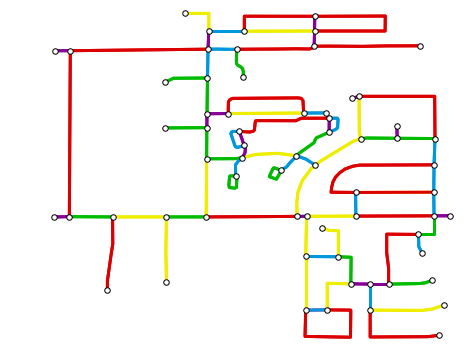

In [9]:
# show the strictly simplified graph with edges colored by network length
ec = osmnx.get_edge_colors_by_attr(G2, attr='length')
fig, ax = osmnx.plot_graph(G2, node_color='w', node_edgecolor='k', node_size=30, node_zorder=3, edge_color=ec, edge_linewidth=3)

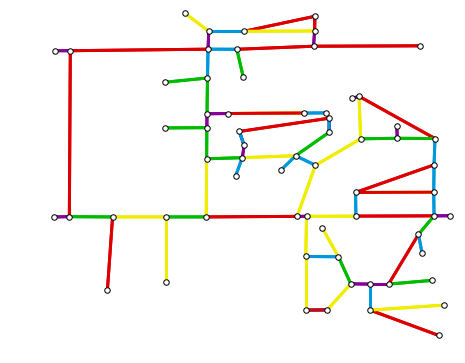

In [10]:
# plot same graph again (topologically isomorphic), this time ignoring the edges' spatial geometry
ec = osmnx.get_edge_colors_by_attr(G2, attr='length')
fig, ax = osmnx.plot_graph(G2, node_color='w', node_edgecolor='k', node_size=30, node_zorder=3, 
                           edge_color=ec, edge_linewidth=3, edge_alpha=1, use_geom=False)

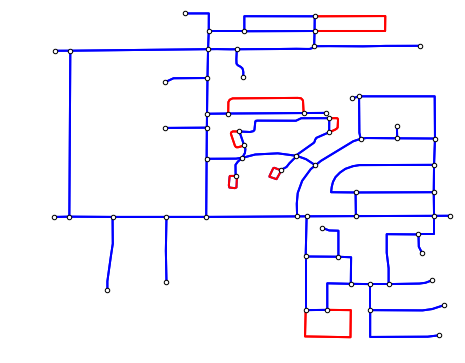

In [11]:
# highlight all parallel edges
ec = ['b' if key == 0 else 'r' for u, v, key in G2.edges(keys=True)]
fig, ax = osmnx.plot_graph(G2, node_color='w', node_edgecolor='k', node_size=20, node_zorder=3, edge_color=ec, edge_linewidth=2)

## Create a 'drivable' street network for downtown SF then simplify it

In [12]:
location_point = (37.791427, -122.410018)
G = osmnx.graph_from_point(location_point, distance=1500, network_type='drive', simplify=False)

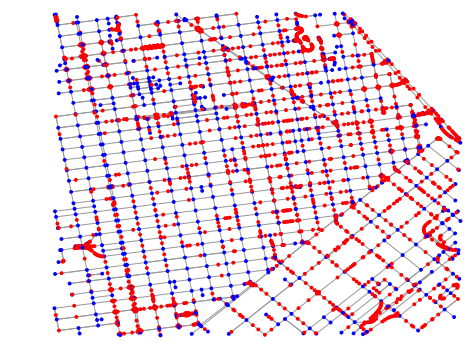

In [13]:
nc = ['b' if osmnx.is_endpoint(G, node) else 'r' for node in G.nodes()]
fig, ax = osmnx.plot_graph(G, node_color=nc, node_zorder=3)

In [14]:
G2 = G.copy()
G2 = osmnx.simplify_graph(G2)

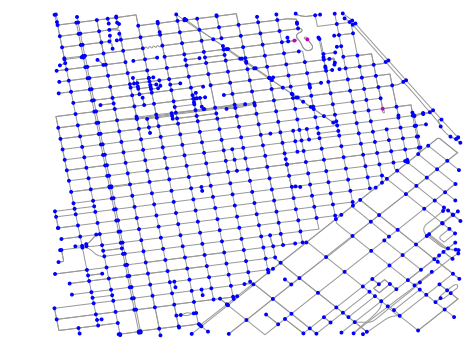

In [15]:
loops = [edge[0] for edge in G2.selfloop_edges()]
nc = ['m' if node in loops else 'b' for node in G2.nodes()]
fig, ax = osmnx.plot_graph(G2, node_color=nc, node_zorder=3)

## Create another suburban street network, then simplify it

In [16]:
G = osmnx.graph_from_address('420 North Corsica Place, Chandler, Arizona', 
                             distance=800, network_type='drive', simplify=False)

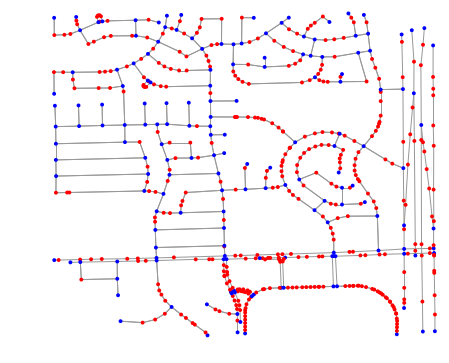

In [17]:
nc = ['b' if osmnx.is_endpoint(G, node) else 'r' for node in G.nodes()]
fig, ax = osmnx.plot_graph(G, node_color=nc, node_zorder=3)

In [18]:
G2 = G.copy()
G2 = osmnx.simplify_graph(G2)

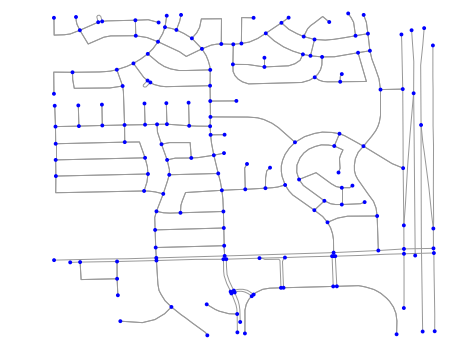

In [19]:
fig, ax = osmnx.plot_graph(G2, node_color='b', node_zorder=3)

In [20]:
# save as ESRI shapefile
osmnx.save_graph_shapefile(G2, filename='arizona')

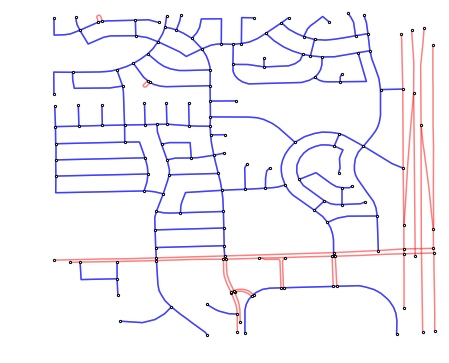

In [21]:
# highlight one-way streets
ec = ['r' if data['oneway'] else 'b' for u, v, key, data in G2.edges(keys=True, data=True)]
fig, ax = osmnx.plot_graph(G2, node_color='w', node_edgecolor='k', node_size=5, node_zorder=3, 
                           edge_color=ec, edge_linewidth=1.5, edge_alpha=0.5)

## Create a drivable street network for all of Oakland then simplify it

In [22]:
G = osmnx.graph_from_place('Oakland, California, USA', network_type='drive', simplify=False)

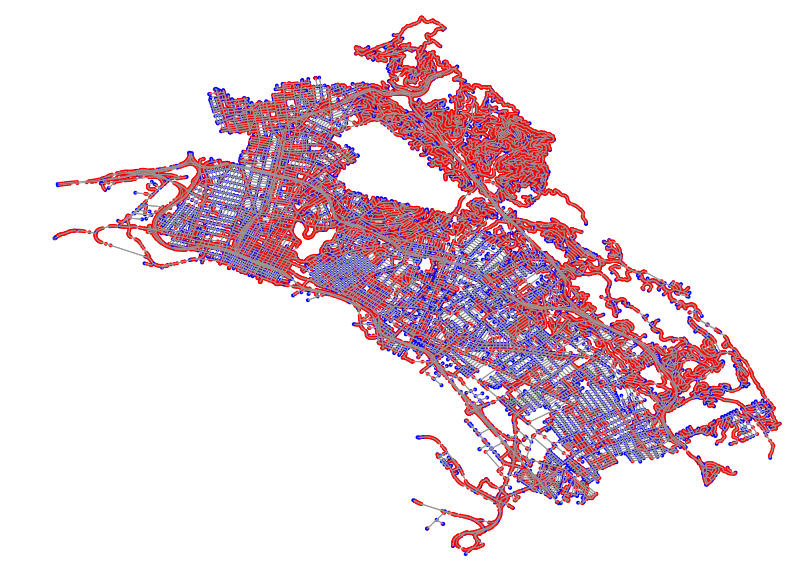

In [23]:
nc = ['b' if osmnx.is_endpoint(G, node) else 'r' for node in G.nodes()]
fig, ax = osmnx.plot_graph(G, fig_height=10, node_color=nc)

In [24]:
G2 = G.copy()
G2 = osmnx.simplify_graph(G2)

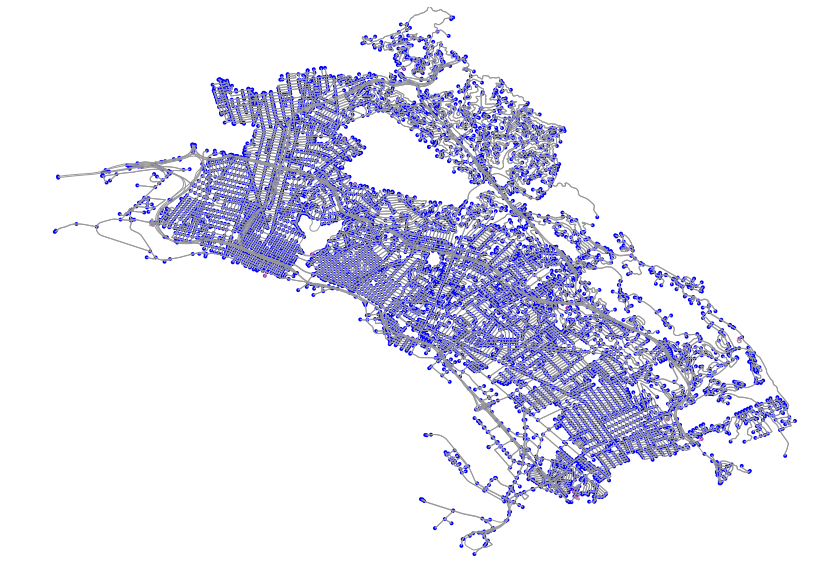

In [25]:
loops = [edge[0] for edge in G2.selfloop_edges()]
nc = ['m' if node in loops else 'b' for node in G2.nodes()]
fig, ax = osmnx.plot_graph(G2, fig_height=10, node_color=nc)

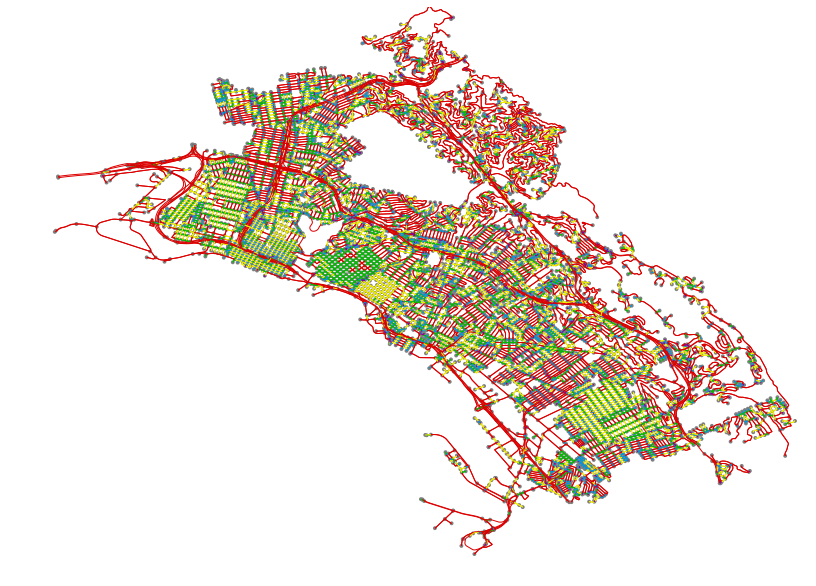

In [26]:
ec = osmnx.get_edge_colors_by_attr(G2, attr='length')
fig, ax = osmnx.plot_graph(G2, fig_height=10, node_color='gray', edge_color=ec, save=True, filename='oak-color')

## Create the street network for old town Venice and visualize it

In [27]:
# bounding box around the islands of old town venice
north = 45.449654
south = 45.421829
east = 12.367387
west = 12.301383
G = osmnx.graph_from_bbox(north, south, east, west)

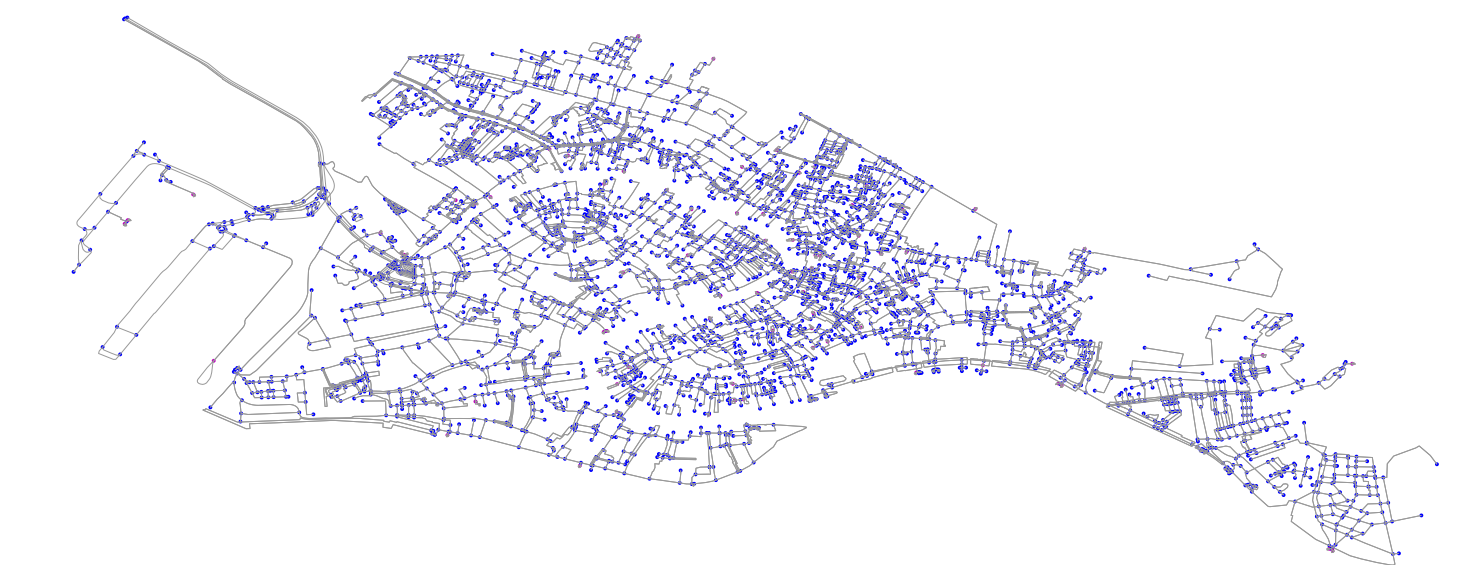

In [28]:
loops = [edge[0] for edge in G.selfloop_edges()]
nc = ['m' if node in loops else 'b' for node in G.nodes()]
fig, ax = osmnx.plot_graph(G, fig_height=10, node_color=nc)

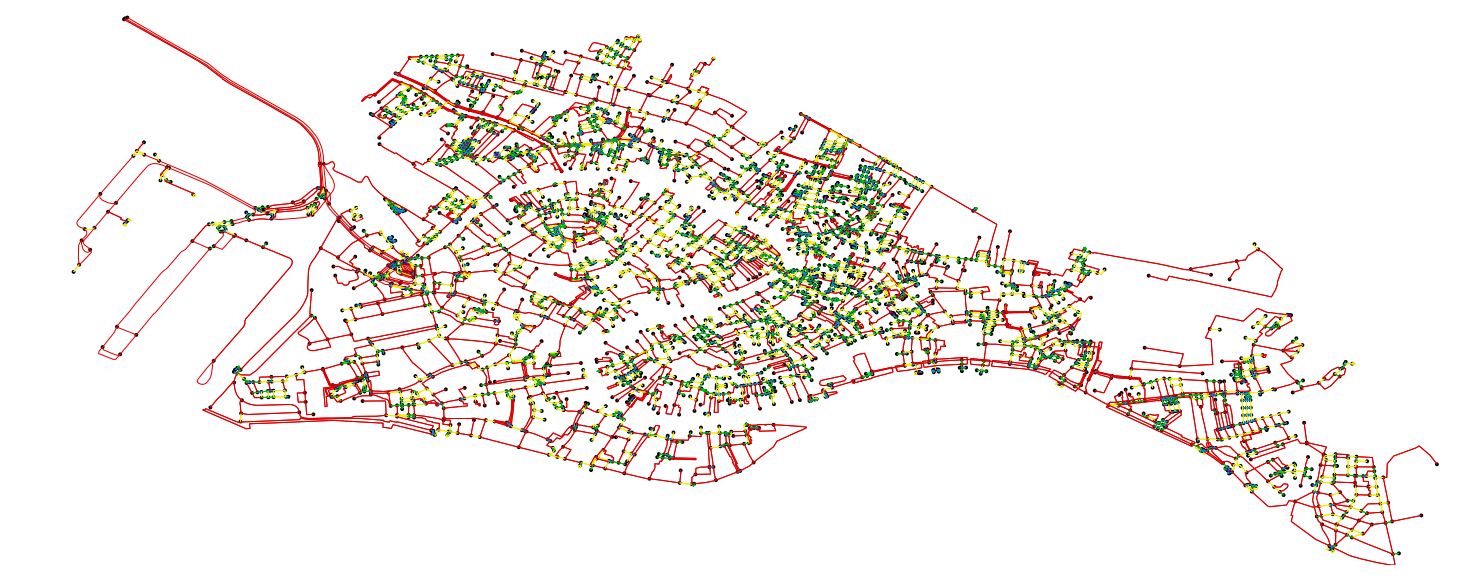

In [29]:
ec = osmnx.get_edge_colors_by_attr(G, attr='length')
fig, ax = osmnx.plot_graph(G, fig_height=10, node_color='k', edge_color=ec, edge_linewidth=1, 
                           save=True, filename='venice-color')

## Demonstrate handling simplification in disconnected subgraphs

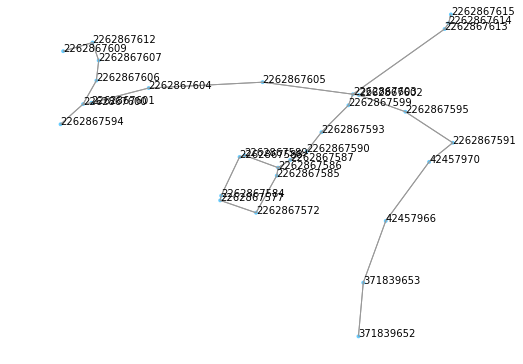

In [30]:
G = osmnx.graph_from_point((33.3001, -111.83096), distance=100, simplify=False)
fig, ax = osmnx.plot_graph(G, annotate=True)

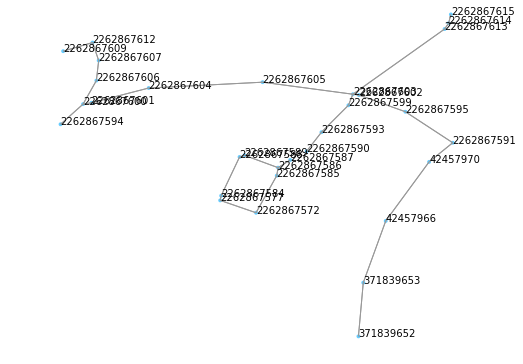

In [31]:
# remove the edge connecting nodes 2262867590 and 2262867587 (remember, bi-directional)
G2 = G.copy()
G2.remove_edge(2262867587, 2262867590)
G2.remove_edge(2262867590, 2262867587)
fig, ax = osmnx.plot_graph(G2, annotate=True)

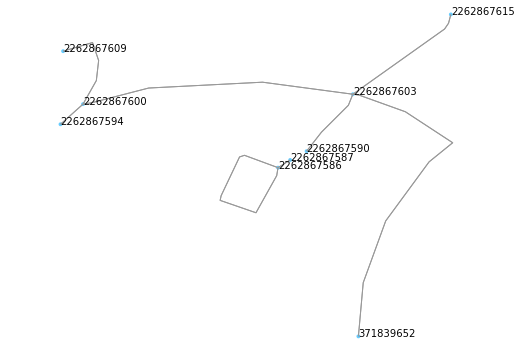

In [32]:
# simplify the disconnected graph - it all works fine
G3 = osmnx.simplify_graph(G2)
fig, ax = osmnx.plot_graph(G3, annotate=True)

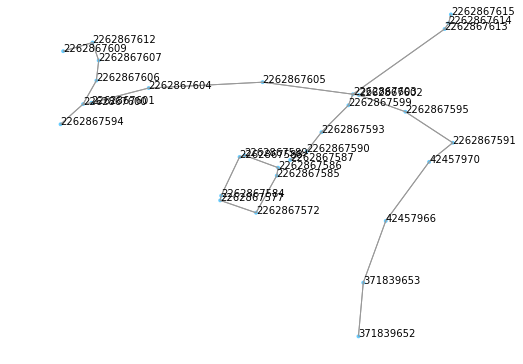

In [33]:
# start over and this time remove the edge connecting nodes 2262867586 and 2262867587
G2 = G.copy()
G2.remove_edge(2262867587, 2262867586)
G2.remove_edge(2262867586, 2262867587)
fig, ax = osmnx.plot_graph(G2, annotate=True)

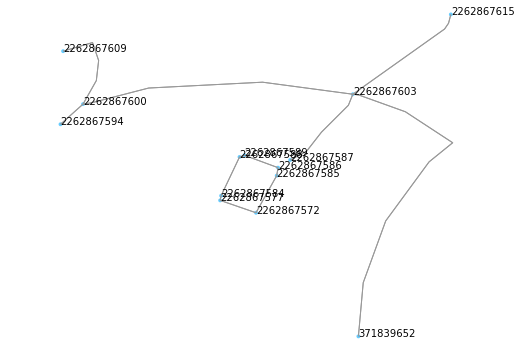

In [34]:
G3 = osmnx.simplify_graph(G2)
fig, ax = osmnx.plot_graph(G3, annotate=True)

The simplification process succeeds, but does not simplify the topology of the ring subgraph. You cannot simplify this subgraph because it is a loop in which no node is an end point.